In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.patches as mpatches
from matplotlib.colors import BoundaryNorm, ListedColormap
import seaborn as sns
from scipy.stats import f_oneway
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
import matplotlib.colors as mcolors

df = pd.read_csv('decision_science_dataset.csv')

In [2]:
df.head(5)

,tag1,tag2,tag3,tag4,tag5,tag6,tag7_resp
0,-1.672214,-2.697522,-0.069320,1.326503,-0.389861,0.920874,0.642428
1,-1.668865,-2.718629,-0.069730,1.326503,-0.389861,0.920874,-0.662266
2,-1.665509,-2.706216,-0.069783,1.326503,-0.389861,0.920874,-1.087046
3,-1.662254,-2.702534,-0.069740,1.326503,-0.389861,0.920874,-1.144705
4,-1.659002,-2.709265,-0.069688,1.326503,-0.357953,0.933739,-0.814785


In [3]:
df.columns

Index(['tag1', 'tag2', 'tag3', 'tag4', 'tag5', 'tag6', 'tag7_resp'], dtype='object')

In [4]:
print(df.shape)

(8362, 7)


In [5]:
result = df.dtypes

print("Output:")
print(result)

Output:
tag1         float64
tag2         float64
tag3         float64
tag4         float64
tag5         float64
tag6         float64
tag7_resp    float64
dtype: object


In [6]:
stats = df.describe()

print(stats)

               tag1          tag2          tag3          tag4         tag5  \
count  8.362000e+03  8.362000e+03  8.362000e+03  8.362000e+03  8362.000000   
mean  -4.135953e-16 -6.658882e-16 -2.028295e-16 -3.375646e-14     0.002325   
std    1.000060e+00  1.000060e+00  1.000060e+00  1.000060e+00     0.713179   
min   -1.672214e+00 -7.860812e+00 -7.127370e-02 -4.438750e+00    -0.999999   
25%   -8.574269e-01 -2.537692e-01 -6.981788e-02 -1.047424e+00    -0.723362   
50%   -2.901490e-02  5.029973e-01 -6.926933e-02  3.091058e-01    -0.022018   
75%    8.175838e-01  5.436844e-01 -6.882521e-02  3.091058e-01     0.729627   
max    2.415766e+00  6.536616e+00  1.442508e+01  5.056962e+00     1.000000   

              tag6     tag7_resp  
count  8362.000000  8.362000e+03  
mean      0.032368  1.450083e-14  
std       0.700316  1.000060e+00  
min      -0.999998 -2.378333e+00  
25%      -0.647282 -7.659383e-01  
50%       0.059132 -2.259199e-01  
75%       0.717674  6.500249e-01  
max       1.00000

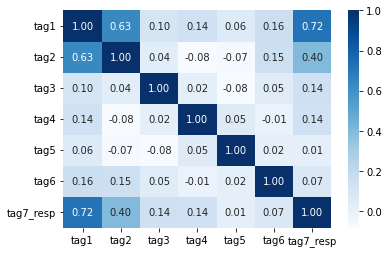

<module 'matplotlib.pyplot' from 'C:\\Users\\gnmrq\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>


In [7]:
def create_heatmap(df):
    # Calculating the correlation matrix
    correlacao = df.corr()

    # Creating the heatmap
    sns.heatmap(correlacao, annot=True, cmap='Blues', fmt='.2f')
    plt.show()

    return plt

correlation_matrix = create_heatmap(df)
print(correlation_matrix)  

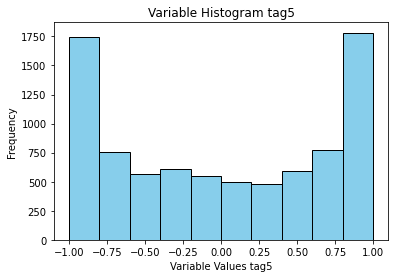

<module 'matplotlib.pyplot' from 'C:\\Users\\gnmrq\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>


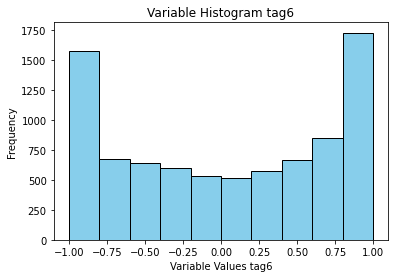

<module 'matplotlib.pyplot' from 'C:\\Users\\gnmrq\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>


In [8]:
def create_histogram(df, column_name):
    
    #Those histograms show both sine and cosine of the data
  
    column_data = df[column_name]

    # Creating a histogram
    plt.hist(column_data, bins=10, edgecolor='black', color='skyblue')

    # Defining labels for x and y
    plt.xlabel(f'Variable Values {column_name}')
    plt.ylabel('Frequency')

    # Defining a title for the graph
    plt.title(f'Variable Histogram {column_name}')

    plt.show()

    return plt

print(create_histogram(df,'tag5'))
print(create_histogram(df,'tag6'))

C:\Users\gnmrq\AppData\Local\Temp\ipykernel_25516\2980883002.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['tag1'] = 'df4'
C:\Users\gnmrq\AppData\Local\Temp\ipykernel_25516\2980883002.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['tag1'] = 'df5'
C:\Users\gnmrq\AppData\Local\Temp\ipykernel_25516\2980883002.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

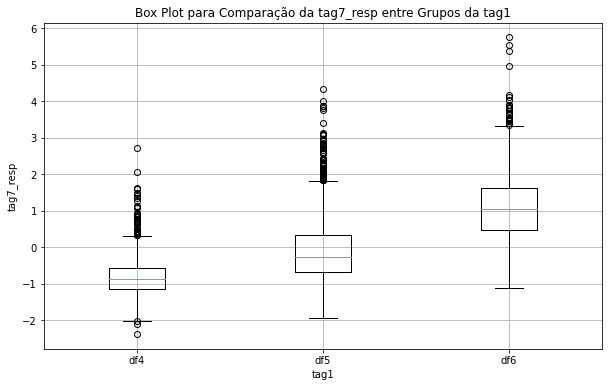

<module 'matplotlib.pyplot' from 'C:\\Users\\gnmrq\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>


In [9]:
def create_box_plot(df):
    
    #creating the quantiles of tag7
    df1=df[df['tag7_resp']<df['tag7_resp'].quantile(0.25)]
    df2=df[(df['tag7_resp']>=df['tag7_resp'].quantile(0.25))&(df['tag7_resp']<df['tag7_resp'].quantile(0.75))]
    df3=df[df['tag7_resp']>=df['tag7_resp'].quantile(0.75)]
    
    #creating the quantiles of tag1
    df4=df[df['tag1']<df['tag1'].quantile(0.25)]
    df5=df[(df['tag1']>=df['tag1'].quantile(0.25))&(df['tag1']<df['tag1'].quantile(0.75))]
    df6=df[df['tag1']>=df['tag1'].quantile(0.75)]
    
    # Calcularing the means for each group
    mean_tag7_resp_df4 = df4['tag7_resp'].mean()
    mean_tag7_resp_df5 = df5['tag7_resp'].mean()
    mean_tag7_resp_df6 = df6['tag7_resp'].mean()
    
    # Adding a column to identify the origin of each dataframe
    df4['tag1'] = 'df4'
    df5['tag1'] = 'df5'
    df6['tag1'] = 'df6'

    # Concatenate all the dataframe
    df_concatenated = pd.concat([df4, df5, df6])

    # Plot the box plot
    plt.figure(figsize=(10, 6))
    plt.boxplot([df4['tag7_resp'], df5['tag7_resp'], df6['tag7_resp']], labels=['df4', 'df5', 'df6'])
    plt.xlabel('tag1')
    plt.ylabel('tag7_resp')
    plt.title('Box Plot para Comparação da tag7_resp entre Grupos da tag1')
    plt.grid(True)
    plt.show()
    
    return plt

print(create_box_plot(df))

C:\Users\gnmrq\AppData\Local\Temp\ipykernel_25516\1342300013.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['tag1_group'] = 'df4'
C:\Users\gnmrq\AppData\Local\Temp\ipykernel_25516\1342300013.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['tag1_group'] = 'df5'
C:\Users\gnmrq\AppData\Local\Temp\ipykernel_25516\1342300013.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

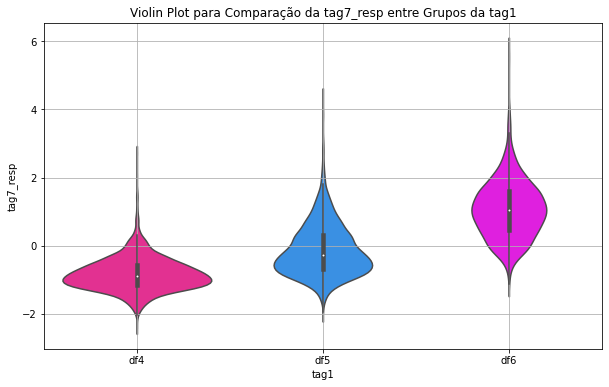

<module 'matplotlib.pyplot' from 'C:\\Users\\gnmrq\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>


In [10]:
def create_violin_plot(df):
    
    #creating the quantiles of tag7
    df1=df[df['tag7_resp']<df['tag7_resp'].quantile(0.25)]
    df2=df[(df['tag7_resp']>=df['tag7_resp'].quantile(0.25))&(df['tag7_resp']<df['tag7_resp'].quantile(0.75))]
    df3=df[df['tag7_resp']>=df['tag7_resp'].quantile(0.75)]
    
    #creating the quantiles of tag1
    df4=df[df['tag1']<df['tag1'].quantile(0.25)]
    df5=df[(df['tag1']>=df['tag1'].quantile(0.25))&(df['tag1']<df['tag1'].quantile(0.75))]
    df6=df[df['tag1']>=df['tag1'].quantile(0.75)]
    
    # Calcularing the means for each group
    mean_tag7_resp_df4 = df4['tag7_resp'].mean()
    mean_tag7_resp_df5 = df5['tag7_resp'].mean()
    mean_tag7_resp_df6 = df6['tag7_resp'].mean()
    
    # Adicionar uma coluna para identificar a origem de cada dataframe
    df4['tag1_group'] = 'df4'
    df5['tag1_group'] = 'df5'
    df6['tag1_group'] = 'df6'

    # Concatenar os dataframes em um único dataframe
    df_concatenated = pd.concat([df4, df5, df6])

    # Define custom colors
    custom_palette = {'df4': 'deeppink', 'df5': 'dodgerblue', 'df6': 'fuchsia'}

    # Plot the violin plot with the custom colors
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='tag1_group', y='tag7_resp', data=df_concatenated, palette=custom_palette)
    plt.xlabel('tag1')
    plt.ylabel('tag7_resp')
    plt.title('Violin Plot para Comparação da tag7_resp entre Grupos da tag1')
    plt.grid(True)
    plt.show()
    
    return plt

print(create_violin_plot(df))

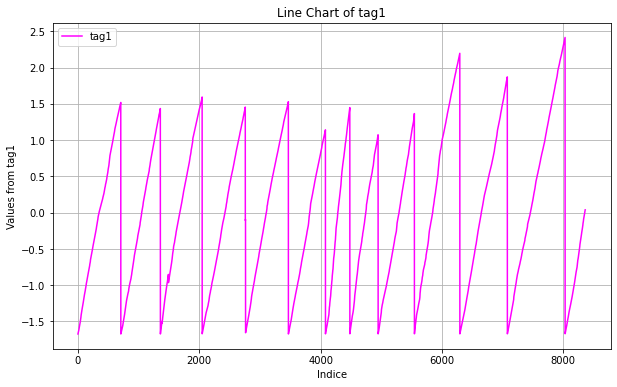

<module 'matplotlib.pyplot' from 'C:\\Users\\gnmrq\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>


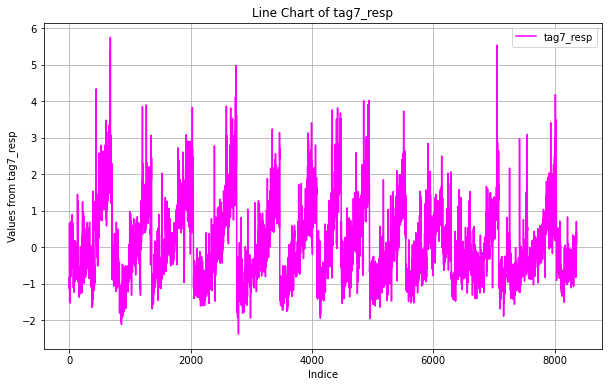

<module 'matplotlib.pyplot' from 'C:\\Users\\gnmrq\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>


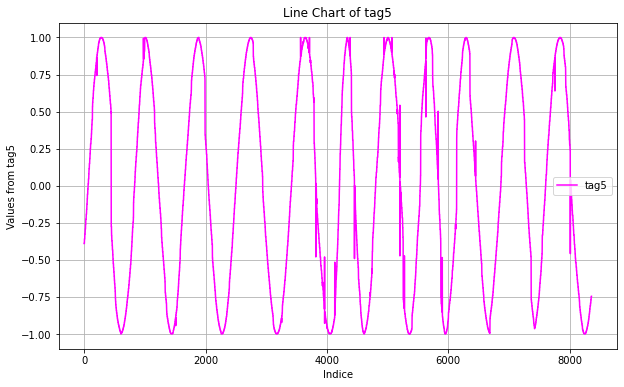

<module 'matplotlib.pyplot' from 'C:\\Users\\gnmrq\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>


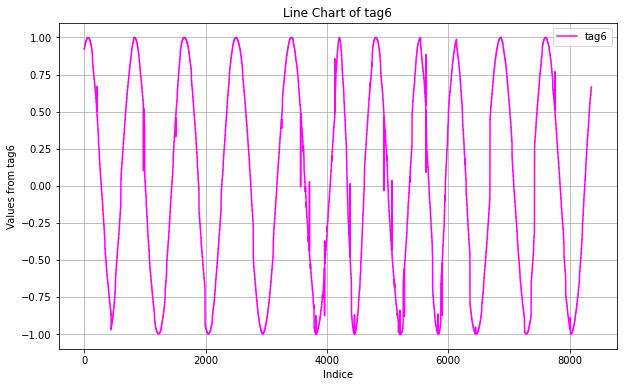

<module 'matplotlib.pyplot' from 'C:\\Users\\gnmrq\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>


In [11]:
def create_line_chart(df, column_name):
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df[column_name], label=column_name, marker='', linestyle='-', color='fuchsia')
    plt.xlabel('Indice')
    plt.ylabel(f'Values from {column_name}')
    plt.title(f'Line Chart of {column_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

    return plt

print(create_line_chart(df,'tag1'))
print(create_line_chart(df,'tag7_resp'))
print(create_line_chart(df,'tag5'))
print(create_line_chart(df,'tag6'))

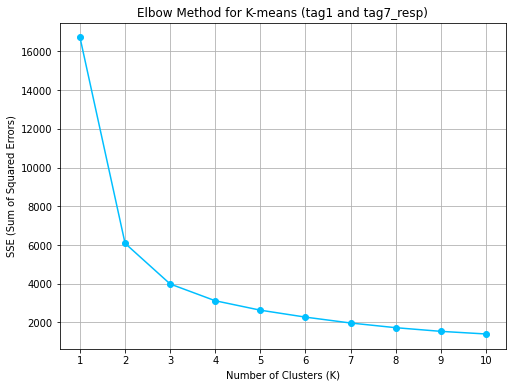

<module 'matplotlib.pyplot' from 'C:\\Users\\gnmrq\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>


In [12]:
def elbow_method(df):
    # Select only the 'tag1' and 'tag7_resp' columns for clustering
    selected_cols = ['tag1', 'tag7_resp']
    data_for_clustering = df[selected_cols]

    # Initialize an empty list to store the SSE values for each value of K
    sse = []

    # Calculate the SSE for different values of K (e.g., 1 to 10)
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data_for_clustering)
        sse.append(kmeans.inertia_)

    # Plot the Elbow Method graph
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 11), sse, marker='o', color='deepskyblue')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('SSE (Sum of Squared Errors)')
    plt.title('Elbow Method for K-means (tag1 and tag7_resp)')
    plt.xticks(np.arange(1, 11, 1))
    plt.grid(True)
    plt.show()

    return plt

print(elbow_method(df))

Cluster 0: 2734 instances
Cluster 1: 2342 instances
Cluster 2: 3286 instances


C:\Users\gnmrq\AppData\Local\Temp\ipykernel_25516\310145404.py:49: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ticks=list(cluster_colors.keys()), label='Cluster')


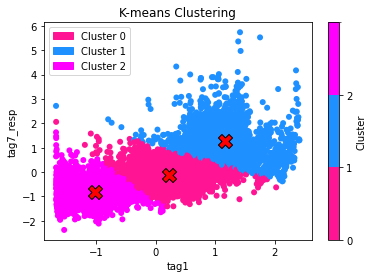

<module 'matplotlib.pyplot' from 'C:\\Users\\gnmrq\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>


In [13]:
def create_cluster(df):
    # Select only the 'tag1' and 'tag7_resp' columns for clustering
    selected_cols = ['tag1', 'tag7_resp']
    data_for_clustering = df[selected_cols]

    # Defining the number of clusters (K)
    K = 3

    # Creating the KMeans object and fitting the data
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(data_for_clustering)

    # Adding the cluster labels to the original DataFrame
    df['cluster_labels'] = kmeans.labels_

    # Creating a dictionary to store each cluster DataFrame
    clusters_dict = {}
    for cluster_num in range(K):
        cluster_df = df[df['cluster_labels'] == cluster_num].copy()
        clusters_dict[cluster_num] = cluster_df

    # Checking the number of instances in each cluster
    for cluster_num, cluster_df in clusters_dict.items():
        print(f'Cluster {cluster_num}: {cluster_df.shape[0]} instances')

    # Saving each cluster DataFrame to a CSV file
    for cluster_num, cluster_df in clusters_dict.items():
        cluster_df.to_csv(f'cluster_{cluster_num}.csv', index=False)

    # Custom color map for scatter plot
    cluster_colors = {0: 'deeppink', 1: 'dodgerblue', 2: 'fuchsia'}
    cluster_labels_color = [cluster_colors[label] for label in df['cluster_labels']]

    # Create custom legend entries with desired colors
    legend_entries = [mpatches.Patch(color=color, label=f'Cluster {cluster_num}') for cluster_num, color in cluster_colors.items()]

    # Plotting the instances colored according to the cluster label
    plt.scatter(df['tag1'], df['tag7_resp'], c=cluster_labels_color, edgecolors='none')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red', edgecolors='k')
    plt.xlabel('tag1')
    plt.ylabel('tag7_resp')
    plt.title('K-means Clustering')
    plt.legend(handles=legend_entries, loc='upper left')

    # Correct the color bar with the custom color map
    cmap = ListedColormap(list(cluster_colors.values()))
    bounds = [x for x in range(K+1)]
    norm = BoundaryNorm(bounds, cmap.N)
    plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ticks=list(cluster_colors.keys()), label='Cluster')

    plt.show()

    return plt


print(create_cluster(df))

In [14]:
print(df.head(5))

       tag1      tag2      tag3      tag4      tag5      tag6  tag7_resp  \
0 -1.672214 -2.697522 -0.069320  1.326503 -0.389861  0.920874   0.642428   
1 -1.668865 -2.718629 -0.069730  1.326503 -0.389861  0.920874  -0.662266   
2 -1.665509 -2.706216 -0.069783  1.326503 -0.389861  0.920874  -1.087046   
3 -1.662254 -2.702534 -0.069740  1.326503 -0.389861  0.920874  -1.144705   
4 -1.659002 -2.709265 -0.069688  1.326503 -0.357953  0.933739  -0.814785   

   cluster_labels  
0               2  
1               2  
2               2  
3               2  
4               2  


In [15]:
cont_unique = df['cluster_labels'].value_counts()

print(cont_unique)

2    3286
0    2734
1    2342
Name: cluster_labels, dtype: int64


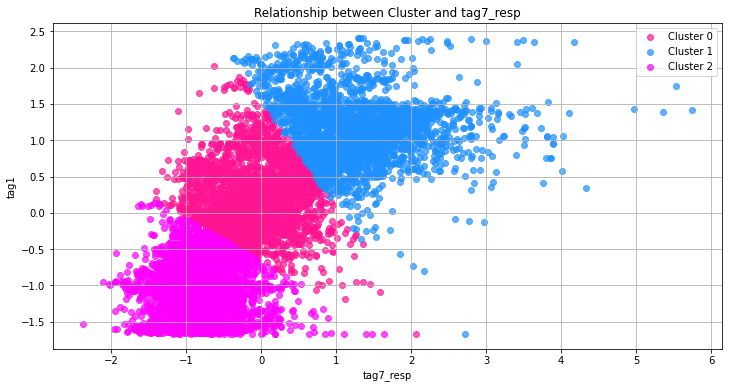

In [16]:
def plot_clusters(cluster_dataframes, cluster_colors):
    
    # Plot the clusters using the specified colors
    plt.figure(figsize=(12, 6))
    for cluster_num, cluster_df in cluster_dataframes.items():
        color = cluster_colors[cluster_num]
        plt.scatter(cluster_df['tag7_resp'], cluster_df['tag1'], label=f'Cluster {cluster_num}', alpha=0.7, color=color)

    plt.xlabel('tag7_resp')
    plt.ylabel('tag1')
    plt.title('Relationship between Cluster and tag7_resp')
    plt.legend()
    plt.grid(True)
    plt.show()

#load the clusters
cluster_0_df = pd.read_csv('cluster_0.csv')
cluster_1_df = pd.read_csv('cluster_1.csv')
cluster_2_df = pd.read_csv('cluster_2.csv')

clusters_dict = {
    0: cluster_0_df,
    1: cluster_1_df,
    2: cluster_2_df
}

# Define the colors for each cluster
cluster_colors = {
    0: 'deeppink',
    1: 'dodgerblue',
    2: 'fuchsia'
}

plot_clusters(clusters_dict, cluster_colors)


In [23]:
def perform_anova_test(df, selected_cols, K):
    """
    Perform the ANOVA test on a DataFrame after clustering using KMeans.

    Parameters:
    - df: DataFrame containing the data for clustering and ANOVA test.
    - selected_cols: List of column names to use for clustering.
    - K: Number of clusters to create using KMeans.

    Returns:
    - F-statistic and p-value obtained from the ANOVA test.
    - A string indicating the result of the test: significant or not significant.
    """

    # Selecting only the specified columns for clustering
    data_for_clustering = df[selected_cols]

    # Creating the KMeans object and fitting the data
    kmeans = KMeans(n_clusters=K)
    kmeans.fit(data_for_clustering)

    # Adding the cluster labels to the original DataFrame
    df['cluster_labels'] = kmeans.labels_

    # Performing the ANOVA test to check the difference between clusters and the 'tag7_resp' variable
    clusters = [df[df['cluster_labels'] == cluster_num]['tag7_resp'] for cluster_num in range(K)]

    f_statistic, p_value = f_oneway(*clusters)

    # Checking the results of the ANOVA test
    if p_value < 0.05:
        result = "There is a significant difference between the clusters and the 'tag7_resp' variable."
    else:
        result = "There is no significant difference between the clusters and the 'tag7_resp' variable."

    return f_statistic, p_value, result


selected_cols = ['tag1', 'tag7_resp']
K = 3
f_stat, p_val, result = perform_anova_test(df, selected_cols, K)

print("ANOVA Test Result:")
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_val:e}")
print(result)

ANOVA Test Result:
F-statistic: 10641.710434471472
P-value: 0.000000e+00
There is a significant difference between the clusters and the 'tag7_resp' variable.


In [18]:
def train_and_evaluate_mlp_regression():
    # Load the DataFrames of each cluster from CSV files
    cluster_0_df = pd.read_csv('cluster_0.csv')
    cluster_1_df = pd.read_csv('cluster_1.csv')
    cluster_2_df = pd.read_csv('cluster_2.csv')

    # Concatenate the DataFrames of each cluster into a single DataFrame
    # with columns 'tag1', 'tag7_resp', and 'cluster_labels'
    merged_df = pd.concat([cluster_0_df, cluster_1_df, cluster_2_df], ignore_index=True)

    # Separate the features (clusters) and the target (tag7_resp)
    X = merged_df.drop(['tag7_resp'], axis=1)
    y = merged_df['tag7_resp']

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the MLPRegressor model
    mlp_regressor = MLPRegressor(hidden_layer_sizes=(256, 128, 64, 32), random_state=42)
    mlp_regressor.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = mlp_regressor.predict(X_test)

    # Evaluate the model's performance
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error (MSE): {mse}')
    
    # Return y_pred and y_test
    return y_pred, y_test, mlp_regressor, X, y, X_test


y_pred, y_test, mlp_regressor, X, y, X_test = train_and_evaluate_mlp_regression()

Mean Squared Error (MSE): 0.1681648953845864


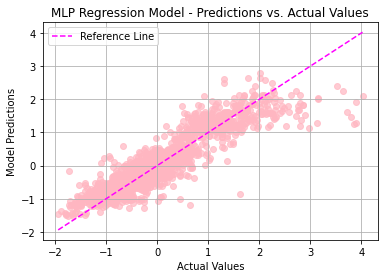

In [19]:
def plot_predictions(y_test, y_pred):
    
    #Plots the model predictions against the actual values.
    # Scatter plot of model predictions against the actual values
    plt.scatter(y_test, y_pred, alpha=0.7, color='lightpink')

    # Plotting a reference line
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', c='fuchsia', label='Reference Line')

    # Set labels for the x and y axes
    plt.xlabel('Actual Values')
    plt.ylabel('Model Predictions')

    # Set the plot title
    plt.title('MLP Regression Model - Predictions vs. Actual Values')

    # Add a legend
    plt.legend()

    # Show the grid
    plt.grid(True)

    plt.show()

    
plot_predictions(y_test, y_pred)

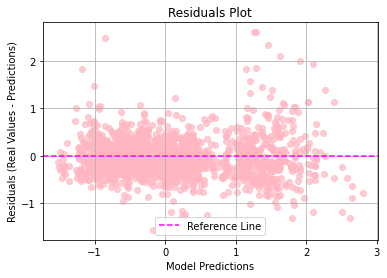

In [20]:
def plot_residuos(y_test, y_pred):
    
    #Plot the residuals graph to check the distribution of errors around zero.
    # Calculate residuals (differences between real values and model predictions)
    residuals = y_test - y_pred

    # Create a scatter plot of model predictions vs. residuals
    plt.scatter(y_pred, residuals, alpha=0.7, color='lightpink')

    # Add a reference line at y=0 to show where the residuals are centered
    plt.axhline(y=0, color='fuchsia', linestyle='--', label='Reference Line')

    # Set labels for the x and y axes
    plt.xlabel('Model Predictions')
    plt.ylabel('Residuals (Real Values - Predictions)')

    # Set the title of the plot
    plt.title('Residuals Plot')

    # Add a legend to the plot
    plt.legend()

    # Add a grid to the plot
    plt.grid(True)

    plt.show()

plot_residuos(y_test, y_pred)

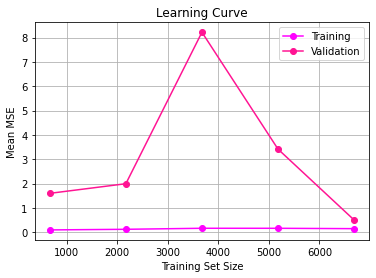

In [21]:
def plot_learning_curve(estimator, X, y, cv=5, scoring='neg_mean_squared_error'):
    """
    Plot the learning curve to check how the model's performance varies with the size of the training set.
    This helps identify whether the model is suffering from underfitting or overfitting.

    Args:
        estimator: The machine learning model.
        X (array-like): The feature matrix.
        y (array-like): The target vector.
        cv (int, cross-validation generator, or an iterable): Determines the cross-validation splitting strategy.
        scoring (str or callable): The scoring method used for evaluation.

    Returns:
        None
    """
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring)
    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, label='Training', marker='o', color='fuchsia')
    plt.plot(train_sizes, test_scores_mean, label='Validation', marker='o', color='deeppink')
    plt.xlabel('Training Set Size')
    plt.ylabel('Mean MSE')
    plt.title('Learning Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_learning_curve(mlp_regressor, X, y, cv=5, scoring='neg_mean_squared_error')

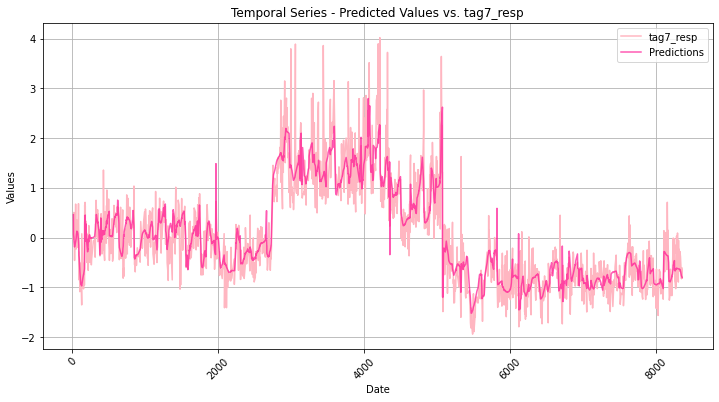

In [22]:
def plot_temporal_series(X_test, y_test, y_pred):
    """
    Create a temporal DataFrame with the predicted values and tag7_resp, then plot the temporal series
    with the colors 'deeppink' and 'lightpink' with transparency.

    Args:
        X_test (pd.DataFrame): DataFrame containing the feature matrix (with the 'data' column as index).
        y_test (pd.Series): Series containing the real values (tag7_resp).
        y_pred (pd.Series): Series containing the predicted values.

    Returns:
        None
    """
    # Create a DataFrame with the predicted values and tag7_resp
    df_temporal = pd.DataFrame({'data': X_test.index, 'tag7_resp': y_test, 'y_pred': y_pred})

    # Sort the DataFrame by date
    df_temporal.sort_values(by='data', inplace=True)

    # Plot the temporal series with the colors 'deeppink' and 'lightpink' with transparency
    plt.figure(figsize=(12, 6))
    plt.plot(df_temporal['data'], df_temporal['tag7_resp'], label='tag7_resp', marker='', color='lightpink')
    plt.plot(df_temporal['data'], df_temporal['y_pred'], label='Predictions', marker='', color='deeppink', alpha=0.7)
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.title('Temporal Series - Predicted Values vs. tag7_resp')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

plot_temporal_series(X_test, y_test, y_pred)